# Credit score classification project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train test split

In [2]:
data = pd.read_csv('train.csv') # dataframe containg everything, not only train
#test = pd.read_csv('test.csv') this one doesn't works - missing target value

test_size = 0.2
X = data.drop(columns=["Credit_Score"]).copy()
y = data["Credit_Score"]


X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=test_size, shuffle=False) 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=test_size, shuffle=False) 
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size, shuffle=False)


c:\Users\tymot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train = X_train.join(y_train)
val = X_val.join(y_val)

# Data Examination

In [4]:
train.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71988 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     68024 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70984 non-null  object 
 14  Delay_

In [6]:
train["Customer_ID"].value_counts().loc[train["Customer_ID"].value_counts() != 8].size # every customer shows up exactly 8 times

0

In [7]:
train['Credit_Score'].isna().sum() # all target values are present

0

(array([14090.,     0.,     0.,     0.,     0., 42479.,     0.,     0.,
            0., 23431.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

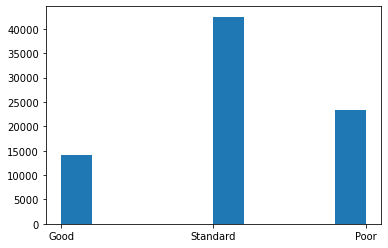

In [8]:
plt.hist(train["Credit_Score"])

In [9]:
train[["Name", "SSN", "Customer_ID"]].head(10) # name, customer id and SSN are redundant

,Name,SSN,Customer_ID
0,Aaron Maashoh,821-00-0265,CUS_0xd40
1,Aaron Maashoh,821-00-0265,CUS_0xd40
2,Aaron Maashoh,821-00-0265,CUS_0xd40
3,Aaron Maashoh,821-00-0265,CUS_0xd40
4,Aaron Maashoh,821-00-0265,CUS_0xd40
5,Aaron Maashoh,821-00-0265,CUS_0xd40
6,Aaron Maashoh,821-00-0265,CUS_0xd40
7,NaN,#F%$D@*&8,CUS_0xd40
8,Rick Rothackerj,004-07-5839,CUS_0x21b1
9,Rick Rothackerj,004-07-5839,CUS_0x21b1


In [10]:
columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt',
                    'Amount_invested_monthly', 'Monthly_Balance']

train[columns_to_alter].iloc[10:20] # some columns have weird signs - "_" and are of wrong format

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
10,28,34847.84_,1,-1,5.42,605.03,58.51597569589465,466.46647639764313
11,28,34847.84,1,3_,5.42,605.03,99.30622796053305,465.6762241330048
12,28,34847.84,1,1,6.42,605.03,130.11542024292334,444.8670318506144
13,28,34847.84,1,0,5.42,605.03,43.477190144355745,481.505261949182
14,28,34847.84,1,4,5.42,605.03,70.10177420755677,464.8806778859809
15,28,34847.84,1,4,5.42,605.03,218.90434353388733,356.07810855965045
16,34,143162.64,3,8,7.1,1303.01,168.413702679309,1043.3159778669492
17,34,143162.64,3,6,7.1,1303.01,232.86038375993544,998.8692967863226
18,34,143162.64,3,7,11.1,1303.01,__10000__,715.741367403555
19,34,143162.64,3,5,9.1,1303.01,825.2162699393922,426.5134106068658


In [11]:
# how different are categorical columns

print(train['Payment_of_Min_Amount'].unique(), "\n",
      train['Occupation'].unique(), "\n",
      train["Credit_Mix"].unique(), "\n",
      train["Payment_Behaviour"].unique())

['No' 'NM' 'Yes'] 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 
 ['_' 'Good' 'Standard' 'Bad'] 
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [12]:
# account age, and behaviour is in unfriendly format

train[["Credit_History_Age", "Payment_Behaviour"]].head()

,Credit_History_Age,Payment_Behaviour
0,22 Years and 1 Months,High_spent_Small_value_payments
1,NaN,Low_spent_Large_value_payments
2,22 Years and 3 Months,Low_spent_Medium_value_payments
3,22 Years and 4 Months,Low_spent_Small_value_payments
4,22 Years and 5 Months,High_spent_Medium_value_payments


<AxesSubplot:>

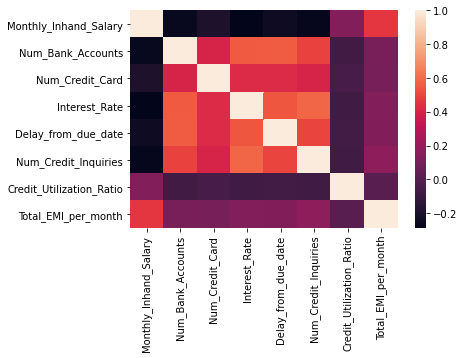

In [13]:
sns.heatmap(train.corr(method="spearman"))

# Data Preprocessing

In [14]:
train = train.drop(['Name', 'SSN'], axis='columns') # no added value, all the information in  Customer_ID
train = train.drop(['ID'], axis='columns') # redundant too 

train["Customer_ID"] = train["Customer_ID"].apply(lambda x: int(x[4:], 16)) # convert to int

In [15]:
# alter datatypes where necessary
columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt',
                    'Amount_invested_monthly', 'Monthly_Balance']

def clear_numeric_data(col):
    # some of the rows contain "_" sign
    col.astype(str).replace("_", "")
    return pd.to_numeric(col, errors="coerce")

train[columns_to_alter] = train[columns_to_alter].apply(clear_numeric_data, axis=1)

In [16]:
train.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [17]:
train["Age"] = np.where((0 > train["Age"]), -train["Age"], train["Age"]) # deleting weird outliners
train['Age'] = np.where((0 <= train['Age']) & (train['Age'] <= 100), train['Age'], float('nan')) 

train["Num_Bank_Accounts"] = np.where((0 < train["Num_Bank_Accounts"]) <= 20, train["Num_Bank_Accounts"], float('nan')) # deleting weird outliners
train["Num_Credit_Card"] = np.where((0 < train["Num_Credit_Card"]) <= 100, train["Num_Credit_Card"], float('nan')) # deleting weird outliners
train["Num_of_Loan"] = np.where((0 < train["Num_of_Loan"]) <= 20, train["Num_of_Loan"], float('nan')) # deleting weird outliners
train["Interest_Rate"] = np.where((0 < train["Interest_Rate"]) <= 100, train["Interest_Rate"], float('nan')) # deleting weird outliners


In [18]:
train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [19]:
# encode columns where necessary (Credit_Mix, Payment_of_Min_Amount, Credit_Score)
# mapping
credit_mix_dict = {'Bad':0, 'Standard':1, 'Good':2, '_':float('nan')}
poma_dict = {'No':0, 'Yes':1, 'NM':float('nan')}
credit_score_dict = {'Poor':0, 'Standard':1, 'Good':2}

train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].map(poma_dict)
train['Credit_Mix'] = train['Credit_Mix'].map(credit_mix_dict)
train['Credit_Score'] = train['Credit_Score'].map(credit_score_dict)

In [20]:
# convert months to numbers:
month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5,
                "June": 6, "July": 7, "August": 8}

train["Month"] = train["Month"].map(month_dict)

In [21]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
train["Payment_Behaviour"] = train["Payment_Behaviour"].apply(split_payment)

train[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(train["Payment_Behaviour"].tolist(), index=train.index)


In [22]:
spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}

train['Spending_Behaviour'] = train['Spending_Behaviour'].map(spending_dict)
train['Value_Payments'] = train['Value_Payments'].map(value_dict)

del train["Payment_Behaviour"]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Age                       73893 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             74418 non-null  float64
 5   Monthly_Inhand_Salary     68024 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               76181 non-null  float64
 10  Type_of_Loan              70984 non-null  object 
 11  Delay_from_due_date       80000 non-null  int64  
 12  Num_of_Delayed_Payment    72259 non-null  float64
 13  Changed_Credit_Limit      78330 non-null  float64
 14  Num_Cr

In [24]:
# processing Credit_History_Age so that's continuous
import re
def history_age(age):
    try : 
        years = int(re.findall('[0-9]+', age)[0])
        month = int(re.findall('[0-9]+', age)[1])
        return years*12 + month
    except :
        return np.nan

In [25]:
train['Credit_History_Age'] = train['Credit_History_Age'].apply(history_age)

In [26]:
# filling missing values
# Monthly_Inhand_Salary, Amount_invested_monthly, Monthly_Balance  are continuous so we may
# replace the null values using 'mean' for particular customers identified by Customer_ID

continuous_values = ['Monthly_Inhand_Salary', 'Amount_invested_monthly',
                     'Monthly_Balance', 'Credit_History_Age', "Outstanding_Debt",
                     "Changed_Credit_Limit", "Annual_Income"]

for column in continuous_values:
    train[column].fillna(train.groupby('Customer_ID')[column].transform('mean'), inplace=True)

In [27]:
# Credit_Mix value is discrete but we may assign to missing rows the values
# from other rows with the same Customer_ID

# using mean is not causing any trouble here, we're practically taking the value that appears
# in the rows with the same id

# but we will use mode for preserving the type in categorical data

discrete_columns = ["Age", "Annual_Income", "Num_Credit_Inquiries", "Num_of_Loan", "Credit_Mix",
                    "Num_of_Delayed_Payment", "Num_Credit_Inquiries", "Spending_Behaviour", "Payment_of_Min_Amount", "Value_Payments"]

for column in discrete_columns:
    #train[column].fillna(train.groupby('Customer_ID')[column].agg(lambda x: pd.Series.mode(x)[0]), inplace=True) 
    train[column].fillna(train.groupby('Customer_ID')[column].transform('median'), inplace=True) 

In [28]:
discrete_string_columns = ["Occupation", "Type_of_Loan"] #fill missing data in columns that are strings

for column in discrete_string_columns:
    most_common_globally = train[column].agg(lambda x: pd.Series.mode(x)[0])
    train[column].fillna(train.groupby('Customer_ID')[column].agg(
        lambda x: (most_common_globally if len(pd.Series.mode(x)) == 0 else pd.Series.mode(x)[0])
        ), inplace=True) 

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Age                       80000 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               80000 non-null  float64
 10  Type_of_Loan              72063 non-null  object 
 11  Delay_from_due_date       80000 non-null  int64  
 12  Num_of_Delayed_Payment    80000 non-null  float64
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num_Cr

In [30]:
# type of loan may contain some interesting information
train['Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
79995    Credit-Builder Loan, Not Specified, and Not Sp...
79996    Credit-Builder Loan, Not Specified, and Not Sp...
79997    Credit-Builder Loan, Not Specified, and Not Sp...
79998    Credit-Builder Loan, Not Specified, and Not Sp...
79999    Credit-Builder Loan, Not Specified, and Not Sp...
Name: Type_of_Loan, Length: 80000, dtype: object

In [31]:
# first we fill the information for customers that have other rows with full information available
train['Type_of_Loan'].fillna(train.groupby('Customer_ID')['Type_of_Loan'].first(), inplace=True)
# later we fill with ''
train['Type_of_Loan'].fillna('', inplace=True)

In [32]:
types =  train['Type_of_Loan'].value_counts().head(9).index[1:] 
for loan_type in types: # the single types of loans
    train[loan_type] = train['Type_of_Loan'].str.contains(loan_type)
del train["Type_of_Loan"]

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Age                       80000 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               80000 non-null  float64
 10  Delay_from_due_date       80000 non-null  int64  
 11  Num_of_Delayed_Payment    80000 non-null  float64
 12  Changed_Credit_Limit      80000 non-null  float64
 13  Num_Credit_Inquiries      80000 non-null  float64
 14  Credit

In [34]:
train = train.join(pd.get_dummies(train['Occupation']))

del train["Occupation"]

<AxesSubplot:>

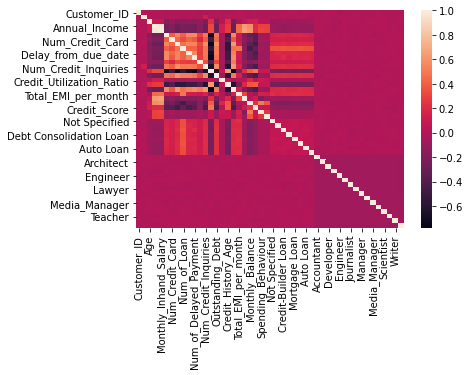

In [35]:
sns.heatmap(train.corr(method="spearman"))

In [ ]:
# eliminate the most irrelevant columns

colnames = []
for colname in train.columns.values[:-1]:
    try:
        if abs(train[colname].corr(train['Credit_Score'])) < 0.1:
            colnames.append(colname)
    except:
        pass # not with every columns the correlation could have been measured, to deal with later

In [ ]:
train = train.drop(colnames, axis=1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Age                       80000 non-null  float64
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Bank_Accounts         80000 non-null  float64
 6   Num_Credit_Card           80000 non-null  float64
 7   Interest_Rate             80000 non-null  float64
 8   Num_of_Loan               80000 non-null  float64
 9   Delay_from_due_date       80000 non-null  int64  
 10  Num_of_Delayed_Payment    80000 non-null  float64
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Credit_Mix                80000 non-null  float64
 14  Outsta

# Choice of columns

In [1]:
from feature.engine import SelectBySingleFeaturePerformance

ModuleNotFoundError: No module named 'feature'

In [ ]:
# Low variance



# Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [40]:
y = train['Credit_Score']
del train['Credit_Score']
#del train['Customer_ID']

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model = RandomForestClassifier(n_estimators=80)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [50]:
y_pred = rf_model.predict(X_val)

In [51]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      4406
           1       0.74      0.74      0.74      8588
           2       0.62      0.54      0.58      3006

    accuracy                           0.70     16000
   macro avg       0.68      0.67      0.67     16000
weighted avg       0.70      0.70      0.70     16000



In [52]:
import shap

def shapley(model, X_train, X_val):
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")